 # load the Denpendencies

In [1]:
!pip install nltk
!pip install gensim
!pip install bokeh

In [108]:
import nltk  ##是一个广泛使用的Python库，用于处理和分析自然语言文本。它提供了各种工具和数据集
from nltk import word_tokenize,sent_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show,figure
import matplotlib.pyplot as plt
%matplotlib inline  
##你就可以在Notebook中看到图表的完整图像，而不会弹出一个新的预览图窗口。

In [3]:
nltk.download("punkt")  ##分词器工具包

[nltk_data] Error loading punkt: [WinError 10060]
[nltk_data]     由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。


False

In [ ]:
nltk.download("gutenberg") ###是一个包含了大量文学作品的语料库

In [1]:
from nltk.corpus import gutenberg

In [2]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
len(gutenberg.fileids())

18

In [6]:
sent_tokenize(gutenberg.raw())[1] ##分句器

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [7]:
word_tokenize(sent_tokenize(gutenberg.raw())[1])  #分词器

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [8]:
gutenberg.sents()

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

In [9]:
input_data = gutenberg.sents()

In [10]:
len(gutenberg.words())

2621613

 # Execute Word2Vec model

In [13]:
model = Word2Vec(sentences=input_data,vector_size= 64,sg=1,window=10,min_count=5,seed = 123)
##因为我的gensim版本是3.0以下的，所以在传递参数时，要把size改成vector_size
model

In [12]:
pip show gensim

Name: gensim
Version: 4.3.2
Summary: Python framework for fast Vector Space Modelling
Home-page: https://radimrehurek.com/gensim/
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: d:\users\86131\anaconda3\envs\python_38_zyj\lib\site-packages
Requires: numpy, scipy, smart-open
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


# Explore the Word2Vec Model

In [18]:
##model.wv.vocab  使用这一行代码会报错，因为gensim版本已经更新，所以更新代码如下
model.wv
vocab_len = len(model.wv)
vocab_len
###通过以上代码你可以获得一个单词表的长度

17011

In [28]:
model.wv["king"]##得到king的维度是64维

array([-2.99334258e-01, -1.50703356e-01,  2.57781833e-01, -5.00469245e-02,
       -1.81610748e-01,  2.09969193e-01,  6.77013993e-01, -7.92512417e-01,
       -1.43407732e-01,  2.14322936e-02, -6.63085639e-01,  3.61876369e-01,
       -1.04899846e-01,  3.98363248e-02, -2.74820834e-01, -2.43565395e-01,
       -4.10893530e-01,  8.26003179e-02,  4.23983067e-01,  3.87334004e-02,
        5.22954524e-01,  6.58501923e-01,  1.83661044e-01,  4.60448623e-01,
       -2.98128724e-01, -4.00838107e-01, -6.54039234e-02, -3.27954829e-01,
       -2.23892972e-01,  8.21542591e-02, -1.71080932e-01,  2.05516368e-01,
        7.37031043e-01, -7.28914398e-04,  6.39077365e-01,  5.42009436e-02,
        6.92870244e-02, -6.64479315e-01,  2.05516383e-01, -1.16388634e-01,
       -1.87399969e-01, -6.13688290e-01, -2.02704057e-01, -6.64892852e-01,
        1.60944998e-01, -5.99551678e-01, -3.65586817e-01, -2.20644578e-01,
        2.19398528e-01,  1.95486590e-01,  1.07139818e-01,  9.97824073e-02,
       -6.42462313e-01,  

In [19]:
##以下是寻找一个单词的相近词
model.wv.most_similar("suppose")

[('think', 0.8546142578125),
 ('anyhow', 0.8154653906822205),
 ('_you_', 0.8145287036895752),
 ('hesitatingly', 0.8104230165481567),
 ('imagine', 0.808970034122467),
 ('Mamma', 0.8078644871711731),
 ('....', 0.7980837821960449),
 ('MUST', 0.7933007478713989),
 ('recollect', 0.792461633682251),
 ('shouldn', 0.7869482040405273)]

In [87]:
model.wv.most_similar("dog")

[('puppy', 0.8360993266105652),
 ('cage', 0.7445329427719116),
 ('pig', 0.7338423728942871),
 ('boy', 0.7322344183921814),
 ('broth', 0.729053795337677),
 ('Lyca', 0.7174643874168396),
 ('butcher', 0.7137711644172668),
 ('chimney', 0.7114971876144409),
 ('bit', 0.7081671357154846),
 ('sweeper', 0.7057289481163025)]

In [22]:
model.wv.doesnt_match("November August Sunday January".split()) 
##该方法的作用是找到词组中与其他不相近的词

'Sunday'

In [24]:
model.wv.similarity("father","mother")  ##查找两个词的相关程度

0.87044775

In [25]:
model.wv.similarity("father","whale")

0.055538647

In [26]:
model.wv.similarity("king","queen")

0.63677657

In [27]:
model.wv.most_similar(positive=["son","woman"],negative=["man"])
##以上语句的意思是找到与son，woman最相近的词，然后排除man

[('conceived', 0.7510596513748169),
 ('daughter', 0.736190140247345),
 ('wife', 0.7247657775878906),
 ('Hagar', 0.7187780737876892),
 ('bare', 0.7026641964912415),
 ('Leah', 0.7014802694320679),
 ('Sarai', 0.6985419392585754),
 ('Rebekah', 0.695186972618103),
 ('Sarah', 0.6827665567398071),
 ('Bilhah', 0.6806727647781372)]

 # Reduce Dimensions with TSNE

In [88]:
import numpy as np
# 获取所有的词向量  
word_vectors = [model.wv[word] for word in model.wv.index_to_key]  
  
# 使用numpy将它们转化成一维数组  ##之前视频代码一直报错的原因就是没有将其转化维一维数组
word_vectors_np = np.array(word_vectors)  
  
# 使用TSNE进行降维  
tsne = TSNE(n_components=2, n_iter=1000, random_state=0)  ##n_components参数指定了降维后的维度数量（这里是2D），n_iter参数指定了优化算法的迭代次数，random_state`参数保证了结果的可重复性。
word_vectors_2d = tsne.fit_transform(word_vectors_np)  
  
# 输出降维后的词向量  
print(word_vectors_2d)

[[ -5.413053  -63.546925 ]
 [ -4.847469  -63.016136 ]
 [ -5.0132585 -63.150402 ]
 ...
 [  7.804735  -40.683384 ]
 [ -6.9554963  -7.071582 ]
 [-14.723054    3.695268 ]]


In [89]:
word_vectors

[array([-0.5198387 , -0.07058765, -0.23796503, -0.37868273, -0.24435432,
         0.09708652, -0.1215826 , -0.12332653, -0.6217487 , -0.18927746,
         0.10854634, -0.5935799 ,  0.10803434,  0.0756354 ,  0.04049628,
         0.02724886, -0.06868296,  0.27015048,  0.14447191, -0.41321912,
        -0.06670535,  0.10433414,  0.1959264 ,  0.4264166 , -0.43787995,
        -0.09271427, -0.01940983,  0.07400548,  0.0456804 ,  0.20459083,
        -0.13076235, -0.12113804,  0.2778058 ,  0.18339573,  0.10948384,
        -0.01617452, -0.3757584 ,  0.28309008, -0.12227342, -0.26808625,
         0.25011757, -0.14531128,  0.19541001,  0.18247567, -0.39628977,
        -0.1241407 ,  0.43337992, -0.14879742,  0.1594812 ,  0.24223807,
         0.4397393 , -0.18480547, -0.14754258, -0.22579919, -0.38352162,
         0.38132063,  0.331774  , -0.46608216,  0.6154238 ,  0.43092   ,
        -0.24360488,  0.33691406, -0.13703546,  0.04229837], dtype=float32),
 array([-0.30925313, -0.17854156,  0.220906  , 

In [94]:
print(len(word_vectors))
print(word_vectors[1].shape)
##根据输出结果可知运算的数据（word_vectors）是17011条64维的数据

17011
(64,)


In [95]:
print(word_vectors_np)

[[-5.19838691e-01 -7.05876499e-02 -2.37965032e-01 ...  3.36914062e-01
  -1.37035459e-01  4.22983728e-02]
 [-3.09253126e-01 -1.78541556e-01  2.20906004e-01 ...  6.58295155e-01
  -2.12239236e-01 -1.24456368e-01]
 [-1.89161167e-01 -4.53109911e-04  4.87172343e-02 ...  4.53231066e-01
  -2.45064460e-02 -7.80393332e-02]
 ...
 [-3.82989794e-01 -7.42921680e-02  2.63934910e-01 ...  1.85834303e-01
   2.44098425e-01  1.28028365e-02]
 [-2.03236490e-01 -3.31863798e-02  1.74363509e-01 ...  9.60770249e-02
   2.05908284e-01  6.35662228e-02]
 [-2.12650850e-01 -6.22048229e-02  4.33104038e-01 ...  1.19413920e-01
   1.64916292e-01  5.98345846e-02]]


In [96]:
x_2d = word_vectors_2d

# 下面采取跟以上方式不一样的降维方法

In [115]:
X = model.wv[model.wv.index_to_key]

In [116]:
tsne = TSNE(n_components=2,n_iter=250)

In [117]:
x_2d = tsne.fit_transform(X)

In [118]:
wv_df = pd.DataFrame(x_2d,columns=["x","y"])
wv_df["token"]= model.wv.key_to_index.keys()###在新版中的vocab已经变成了key_to_index，对这个表加了新的一列token

In [119]:
wv_df

,x,y,token
0,0.191427,-0.297691,","
1,0.190716,-0.392384,the
2,0.128580,-0.347426,and
3,-0.230991,-0.219696,.
4,0.151023,-0.374913,of
...,...,...,...
17006,-0.156767,-0.170635,Cannibal
17007,-0.007208,-0.270472,miscellaneous
17008,0.200722,-0.347926,homewards
17009,-0.073187,-0.117260,exclusive


In [120]:
wv_df.head(15)

,x,y,token
0,0.191427,-0.297691,","
1,0.190716,-0.392384,the
2,0.128580,-0.347426,and
3,-0.230991,-0.219696,.
4,0.151023,-0.374913,of
5,0.006538,0.502736,:
6,-0.064108,-0.229472,to
7,0.019608,-0.338977,a
8,0.145752,-0.389743,in
9,-0.358468,0.044048,I


<Axes: xlabel='x', ylabel='y'>

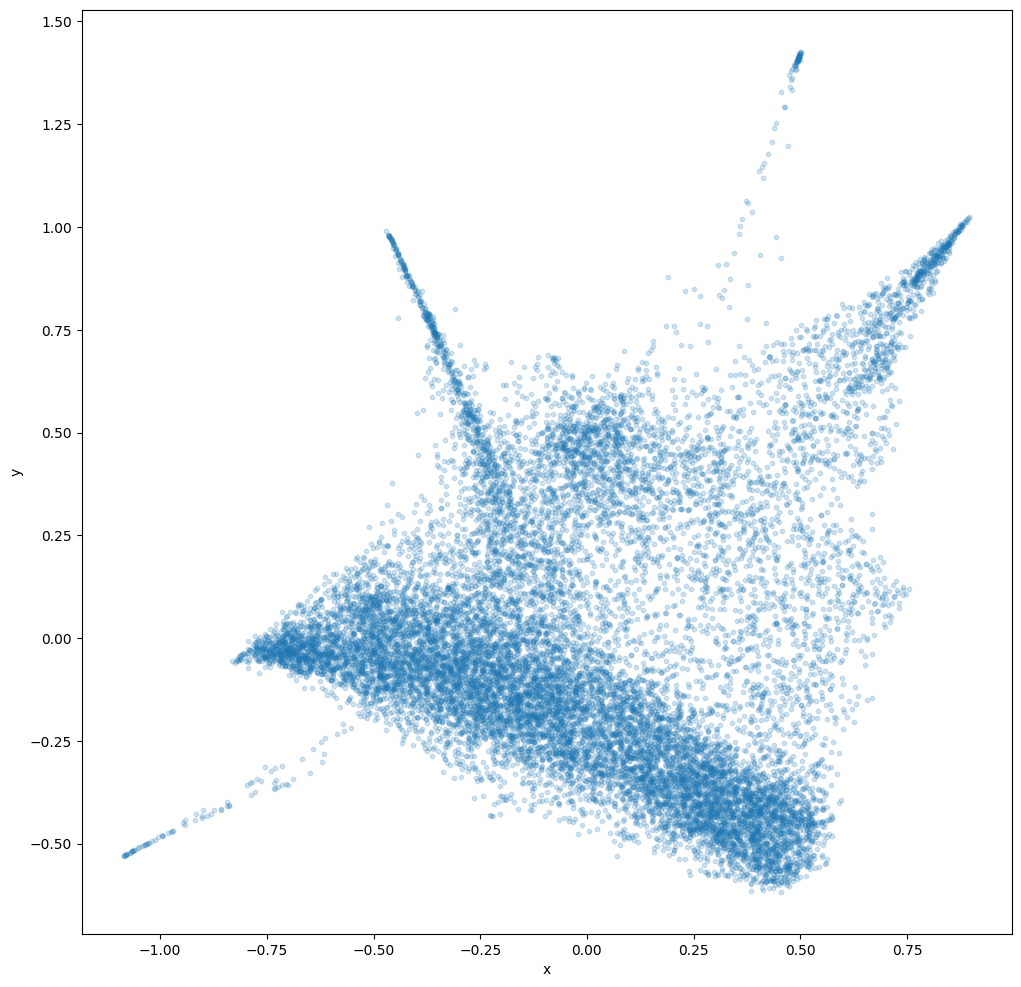

In [128]:
wv_df.plot.scatter("x","y",figsize = (12,12),s=10,alpha=0.2)
# wv_df.plot.scatter("x","y" ,figsize=(10,10),s = 10,alpha = 0.3 )

In [130]:
output_notebook()

Loading BokehJS ...

In [134]:
sub_wv_df = wv_df.sample(n = 7500)##载入上图中的7500个数据

In [138]:
p = figure(width = 800 ,height = 800)
_=p.text(x = sub_wv_df.x,y=sub_wv_df.y , text = sub_wv_df.token,alpha = 0.5)

In [139]:
show(p)

In [ ]:
##视频学习来自于youtubeNLP205